In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Google-Playstore.csv")

In [4]:
# Drop rows with null values
for column in df.columns:
		df.drop(labels=df.index[df[column].isna()],inplace=True)

print(df.shape)

(1287191, 24)


In [5]:
# Drop rows with size or minimum android version = "Varies with device"
df.drop(labels=df.index[df["Size"] == "Varies with device"],inplace=True)
df.drop(labels=df.index[df["Minimum Android"] == "Varies with device"],inplace=True)

print(df.shape)

(1249667, 24)


In [6]:
# Convert all sizes to the same units
def normalize_size(size):
    nsize = float(size[:-1].replace(",", ""))
    if size[-1] == "G":
        return nsize*1024
    elif size[-1] == "k":
        return nsize/1024
    else:
        return nsize

df['Size'] = df['Size'].apply(normalize_size)

In [7]:
# Remove android version specifications with no. of apps < 1000 (outliers)
unique_versions = set(df["Minimum Android"])
version_cnts = {}
for s in unique_versions:
    version_cnts[s] = sum(df["Minimum Android"].str.count(s))

df["vcount"] = df["Minimum Android"].apply(lambda x: version_cnts[x])

df.drop(labels=df.index[df["vcount"] < 1000],inplace=True)

print(df.shape)

(1248021, 25)


In [8]:
# Delete unnecessary columns
drop_columns = ["Developer Website", "Developer Email", "Scraped Time", "Privacy Policy", "vcount", "Developer Id"]
df.drop(drop_columns, inplace=True, axis=1)

print(df.shape)

(1248021, 19)


In [9]:
df.to_csv("Google-Playstore-Preprocessed.csv")

In [10]:
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10.0,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,USD,46.0,6.0 and up,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,USD,3.5,4.1 and up,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312933,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,Music & Audio,4.0,344.0,"500,000+",500000.0,814548,True,0.0,USD,4.1,2.2 and up,"Dec 11, 2014","Dec 11, 2014",Everyone,False,False,False
2312934,Vietnamese - English Translator,com.eliminatesapps.vietnamesetranslator,Education,0.0,0.0,5+,5.0,6,True,0.0,USD,3.6,4.0 and up,"Jun 15, 2020","Aug 31, 2020",Everyone,True,False,False
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10.0,4.1 and up,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44.0,4.1 and up,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False


In [11]:
df['Last Updated']

0          Feb 26, 2020
1          May 06, 2021
4          Nov 12, 2018
5          Dec 20, 2019
9          Oct 07, 2020
               ...     
2312933    Dec 11, 2014
2312934    Aug 31, 2020
2312938    Dec 14, 2018
2312940    Feb 02, 2018
2312942    May 05, 2021
Name: Last Updated, Length: 1248021, dtype: object

In [12]:
for col1, col2 in zip(df['Minimum Installs'], df['Installs']):
    cleaned_Installs = cleaned_string = ''.join(filter(str.isdigit, col2))
    if(int(col1) != int(cleaned_Installs)):
        print(col1, col2)

# This proves that the columns 'Installs' and 'Minimum installs' convey the same information. Thus, we decided to drop the column 'Installs'.

In [13]:
df.drop(['Installs'], inplace=True, axis=1)
df

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10.0,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
5,IMOCCI,com.imocci,Social,0.0,0.0,50.0,89,True,0.0,USD,46.0,6.0 and up,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000.0,62433,True,0.0,USD,3.5,4.1 and up,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312933,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,Music & Audio,4.0,344.0,500000.0,814548,True,0.0,USD,4.1,2.2 and up,"Dec 11, 2014","Dec 11, 2014",Everyone,False,False,False
2312934,Vietnamese - English Translator,com.eliminatesapps.vietnamesetranslator,Education,0.0,0.0,5.0,6,True,0.0,USD,3.6,4.0 and up,"Jun 15, 2020","Aug 31, 2020",Everyone,True,False,False
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10.0,4.1 and up,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,True,0.0,USD,44.0,4.1 and up,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False


In [14]:
# Finding the top 10 categories by rating
unique_Categories = df['Category'].unique()
result:dict = {}
for category in unique_Categories:
    filtered_Df = df[df['Category'] == category]
    total = 0
    count = 0
    for i in range(len(filtered_Df)):
        total += (filtered_Df.iloc[i]['Rating Count'] * filtered_Df.iloc[i]['Rating'])
        count += filtered_Df.iloc[i]['Rating Count']
    result[category] = total/count
top_10 = sorted(result.items(), key=lambda x: x[1], reverse=True)[:10]

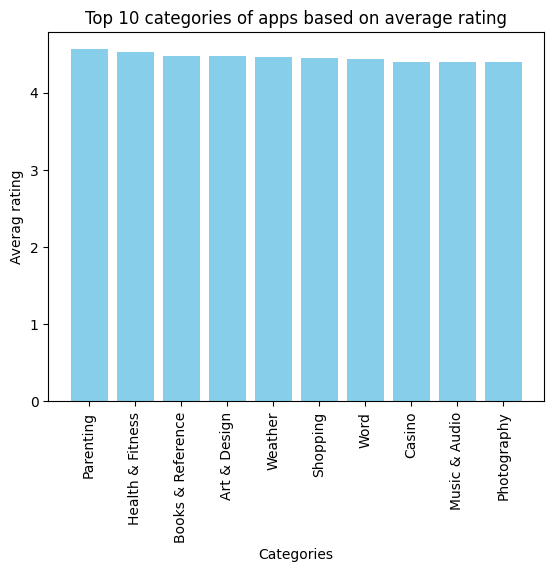

In [15]:
import matplotlib.pyplot as plt
categories:list = []
values: list = []

for key, value in top_10:
    categories.append(key)
    values.append(value)

# Creating the bar graph
plt.bar(categories, values, color='skyblue')  # Adjust color as needed

# Adding titles and labels
plt.title('Top 10 categories of apps based on average rating')
plt.xlabel('Categories')
plt.ylabel('Averag rating')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [16]:
# Finding the top 10 categories by maximum installs
unique_Categories = df['Category'].unique()
result:dict = {}
for category in unique_Categories:
    filtered_Df = df[df['Category'] == category]
    installs = 0
    for i in range(len(filtered_Df)):
        installs += df.iloc[i]['Maximum Installs']
    result[category] = installs
top_10 = sorted(result.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_10)

[('Education', np.int64(37345053176)), ('Business', np.int64(27446306303)), ('Music & Audio', np.int64(23962793230)), ('Lifestyle', np.int64(20257109756)), ('Tools', np.int64(17067872352)), ('Entertainment', np.int64(16476572649)), ('Books & Reference', np.int64(15184200719)), ('Health & Fitness', np.int64(13629735363)), ('Shopping', np.int64(12662445167)), ('Travel & Local', np.int64(12086827827))]


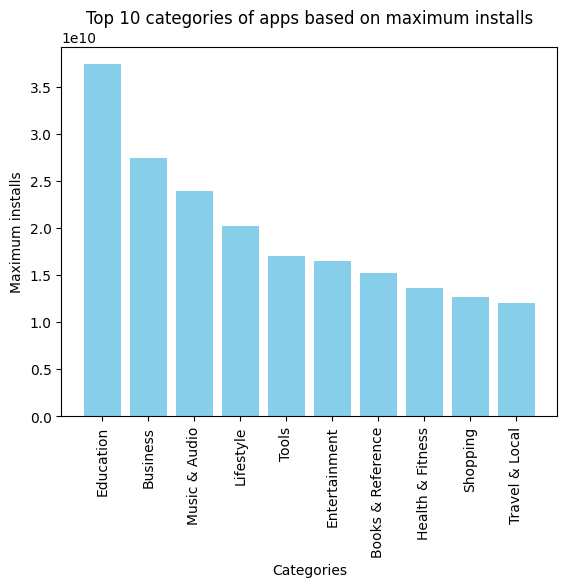

In [17]:
import matplotlib.pyplot as plt
categories:list = []
values: list = []

for key, value in top_10:
    categories.append(key)
    values.append(value)

# Creating the bar graph
plt.bar(categories, values, color='skyblue')  # Adjust color as needed

# Adding titles and labels
plt.title('Top 10 categories of apps based on maximum installs')
plt.xlabel('Categories')
plt.ylabel('Maximum installs')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [18]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [21]:
# Finding the success of apps based on their content rating by calculating average rating.
contents = df['Content Rating'].unique()
result:dict = {}
for content in contents:
    filtered_Df = df[df['Content Rating'] == content]
    total = 0
    count = 0
    for i in range(len(filtered_Df)):
        total += (df.iloc[i]['Rating Count'] * df.iloc[i]['Rating'])
        count += df.iloc[i]['Rating Count']
    result[content] = total/count
for key, value in result.items():
    print(f'{key}: {value}')

Everyone: 4.305094477462964
Teen: 4.27727490358208
Everyone 10+: 4.285004871912712
Mature 17+: 4.3220344422180474
Adults only 18+: 4.005793459923185
Unrated: 3.821093941623743


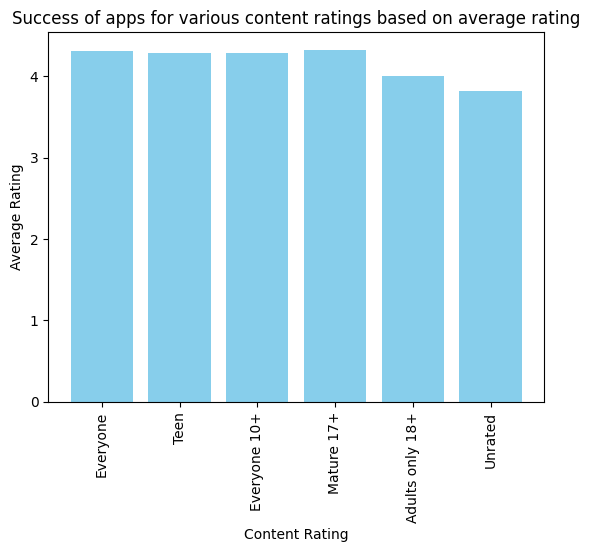

In [23]:
import matplotlib.pyplot as plt
categories:list = []
values: list = []

for key, value in result.items():
    categories.append(key)
    values.append(value)

# Creating the bar graph
plt.bar(categories, values, color='skyblue')  # Adjust color as needed

# Adding titles and labels
plt.title('Success of apps for various content ratings based on average rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [24]:
# Finding the success of apps based for different content ratings based on maximum installs
contents = df['Content Rating'].unique()
result:dict = {}
for content in contents:
    filtered_Df = df[df['Content Rating'] == content]
    installs = 0
    for i in range(len(filtered_Df)):
        installs += df.iloc[i]['Maximum Installs']
    result[content] = installs
for key, value in result.items():
    print(f'{key}: {value}')

Everyone: 310829331540
Teen: 30957351307
Everyone 10+: 4045534703
Mature 17+: 7770878975
Adults only 18+: 36191415
Unrated: 936254


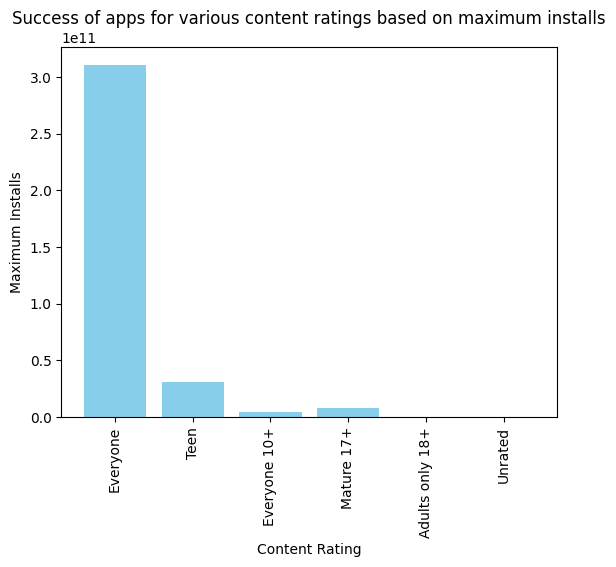

In [26]:
import matplotlib.pyplot as plt
categories:list = []
values: list = []

for key, value in result.items():
    categories.append(key)
    values.append(value)

# Creating the bar graph
plt.bar(categories, values, color='skyblue')  # Adjust color as needed

# Adding titles and labels
plt.title('Success of apps for various content ratings based on maximum installs')
plt.xlabel('Content Rating')
plt.ylabel('Maximum Installs')
plt.xticks(rotation=90)

# Display the plot
plt.show()